In [ ]:
## 구글 드라이브 mount

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
path = '/content/drive/MyDrive/energy_data/'

In [3]:
train = pd.read_csv(path +'train.csv', encoding='cp949')
train['date_time'] = pd.to_datetime(train['date_time'])
test = pd.read_csv(path + 'test.csv', encoding='cp949')
test['date_time'] = pd.to_datetime(test['date_time'])

sample_submission = pd.read_csv(path + 'sample_submission.csv', encoding='cp949')

In [4]:
train.info()
print('='*50)
train.isnull().sum() # null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   num         122400 non-null  int64         
 1   date_time   122400 non-null  datetime64[ns]
 2   전력사용량(kWh)  122400 non-null  float64       
 3   기온(°C)      122400 non-null  float64       
 4   풍속(m/s)     122400 non-null  float64       
 5   습도(%)       122400 non-null  float64       
 6   강수량(mm)     122400 non-null  float64       
 7   일조(hr)      122400 non-null  float64       
 8   비전기냉방설비운영   122400 non-null  float64       
 9   태양광보유       122400 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 9.3 MB


num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
dtype: int64

In [5]:
test.info()
print('='*50)
test.isnull().sum() # test null 값 존재!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   num           10080 non-null  int64         
 1   date_time     10080 non-null  datetime64[ns]
 2   기온(°C)        3360 non-null   float64       
 3   풍속(m/s)       3360 non-null   float64       
 4   습도(%)         3360 non-null   float64       
 5   강수량(mm, 6시간)  1680 non-null   float64       
 6   일조(hr, 3시간)   3360 non-null   float64       
 7   비전기냉방설비운영     2296 non-null   float64       
 8   태양광보유         1624 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 708.9 KB


num                0
date_time          0
기온(°C)          6720
풍속(m/s)         6720
습도(%)           6720
강수량(mm, 6시간)    8400
일조(hr, 3시간)     6720
비전기냉방설비운영       7784
태양광보유           8456
dtype: int64

#### 1-1 결측치 처리
- Train data의 기간동안 비전기냉방설운영 형태나 태양광보유 상황이 달라지지 않은 것으로 보여, 현재의 값들로 test 데이터의 Null값을 채웁니다.
- 기온/풍속/습도/강수량/일조데이터는 선형보간으로 값을 채웁니다.

In [6]:
train.drop_duplicates(subset=['num','비전기냉방설비운영','태양광보유']).dropna()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
2040,2,2020-06-01,977.184,18.3,2.5,94.0,0.0,0.0,1.0,0.0
4080,3,2020-06-01,3183.624,17.0,2.0,100.0,1.1,0.0,1.0,1.0
6120,4,2020-06-01,339.552,22.6,0.7,62.0,0.0,0.0,1.0,1.0
8160,5,2020-06-01,3063.744,18.3,2.5,94.0,0.0,0.0,1.0,0.0
10200,6,2020-06-01,527.580,17.0,2.0,100.0,1.1,0.0,0.0,0.0
12240,7,2020-06-01,1313.658,17.6,2.5,92.0,0.8,0.0,1.0,0.0
14280,8,2020-06-01,4801.977,19.1,1.1,73.0,0.0,0.0,1.0,1.0
16320,9,2020-06-01,1255.932,20.3,1.1,74.0,0.0,0.0,0.0,1.0
18360,10,2020-06-01,417.960,18.3,2.5,94.0,0.0,0.0,1.0,0.0


In [7]:
sun = train.groupby('num')['태양광보유'].unique()
non_ele = train.groupby('num')['비전기냉방설비운영'].unique()

In [8]:
test['태양광보유'] = test['num'].map(sun).astype(int)
test['비전기냉방설비운영'] = test['num'].map(non_ele).astype(int)

In [9]:
test = test.interpolate()
test.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00:00:00,27.800000,1.500000,74.000000,0.0,0.0,0,0
1,1,2020-08-25 01:00:00,27.633333,1.366667,75.333333,0.0,0.0,0,0
2,1,2020-08-25 02:00:00,27.466667,1.233333,76.666667,0.0,0.0,0,0
3,1,2020-08-25 03:00:00,27.300000,1.100000,78.000000,0.0,0.0,0,0
4,1,2020-08-25 04:00:00,26.900000,1.166667,79.666667,0.0,0.0,0,0


### 1-2 Feature Engineering

In [10]:
# date time에서 요일과 시간 추출
train['weekday'] = train['date_time'].dt.weekday + 1
train['hour'] = train['date_time'].dt.hour

test['weekday'] = test['date_time'].dt.weekday + 1
test['hour'] = test['date_time'].dt.hour

In [11]:
train['weekday'].value_counts()

1    18720
7    17280
6    17280
5    17280
4    17280
3    17280
2    17280
Name: weekday, dtype: int64

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

d_list = []
for i in range(1, 61):
    d = train[train['num'] == i].copy() 
    d['전력사용량(kWh)'] = scaler.fit_transform(d['전력사용량(kWh)'].values.reshape(-1,1))
    d_ = d.groupby(['weekday','hour'])['전력사용량(kWh)'].mean().unstack()
    d_list.append(d_.to_numpy())
    
# 정규화된 시간 - 요일별 전력사용량을 이미지처럼 저장
d_list = np.array(d_list)

In [13]:
d_list.shape

(60, 7, 24)

In [14]:
d_list_ = d_list.reshape(60,-1)
d_list_.shape

(60, 168)

In [15]:
model = KMeans(init="k-means++", n_clusters=4, random_state=0)
model.fit(d_list_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [16]:
cluster = model.labels_
pd.DataFrame(cluster).value_counts()

1    31
2    17
3     7
0     5
dtype: int64

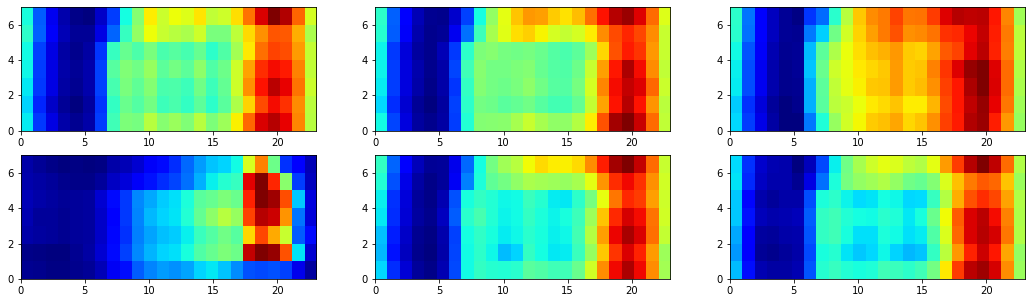

In [17]:
idx = cluster == 3
d_list = d_list.reshape(60,7,24)

fig, axes = plt.subplots(2, int(len(d_list[idx])/2), figsize=(18,5))
axes = axes.flatten()

for d, ax in zip(d_list[idx], axes):
    d_ = scaler.inverse_transform(d)
    
    ax.imshow(d_, cmap='jet', aspect='auto', extent=[0,23,0,7], origin='lower')

In [18]:
cluster_map = {i+1 : c for i, c in enumerate(cluster)}
train['cluster'] = train['num'].map(cluster_map)
test['cluster'] = test['num'].map(cluster_map)

### 2. Modeling
- K-fold와 lgbm으로 모델 구성

In [19]:
X = train.drop(['date_time', '전력사용량(kWh)'], axis = 1)
y = train['전력사용량(kWh)']
X_test = test.drop('date_time', axis = 1)

In [20]:
X.head()

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,weekday,hour,cluster
0,1,17.6,2.5,92.0,0.8,0.0,0.0,0.0,1,0,0
1,1,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,1,0
2,1,17.5,3.2,91.0,0.0,0.0,0.0,0.0,1,2,0
3,1,17.1,3.2,91.0,0.0,0.0,0.0,0.0,1,3,0
4,1,17.0,3.3,92.0,0.0,0.0,0.0,0.0,1,4,0


In [21]:
#Lightgbm Regressor

In [23]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.model_selection import StratifiedKFold

n_splits = 5
sfk = StratifiedKFold(n_splits = n_splits)

y_pred = np.zeros(len(X_test))

# train데이터셋에서 건물의 비율을 동일하게하기 위해 StratifiedKFold 사용
for tr_idx, val_idx in sfk.split(X, X['num']):      
    X_train = X.iloc[tr_idx, :]
    y_train = y[tr_idx]

    X_val = X.iloc[val_idx, :]
    y_val = y[val_idx]

    lgbm = LGBMRegressor(n_estimators = 10000, learning_rate= 0.05,objective = 'mse',bossting_type='dart')
    lgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric= 'rmse', early_stopping_rounds= 50,verbose = 100)
    y_pred += lgbm.predict(X_test) / n_splits

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 411.768	valid_0's l2: 169553
[200]	valid_0's rmse: 359.916	valid_0's l2: 129539
[300]	valid_0's rmse: 344.583	valid_0's l2: 118738
[400]	valid_0's rmse: 331.518	valid_0's l2: 109904
[500]	valid_0's rmse: 325.672	valid_0's l2: 106062
[600]	valid_0's rmse: 322.096	valid_0's l2: 103746
[700]	valid_0's rmse: 318.189	valid_0's l2: 101244
[800]	valid_0's rmse: 315.266	valid_0's l2: 99392.9
[900]	valid_0's rmse: 313.749	valid_0's l2: 98438.6
[1000]	valid_0's rmse: 312.185	valid_0's l2: 97459.4
[1100]	valid_0's rmse: 310.395	valid_0's l2: 96345.1
[1200]	valid_0's rmse: 309.079	valid_0's l2: 95529.6
[1300]	valid_0's rmse: 308.05	valid_0's l2: 94894.8
[1400]	valid_0's rmse: 306.969	valid_0's l2: 94230
[1500]	valid_0's rmse: 306.378	valid_0's l2: 93867.3
[1600]	valid_0's rmse: 305.973	valid_0's l2: 93619.6
[1700]	valid_0's rmse: 305.448	valid_0's l2: 93298.7
[1800]	valid_0's rmse: 304.806	valid_0's l2: 92906.6
[19

In [24]:
submission = sample_submission.copy()
submission['answer'] = y_pred
submission.to_csv('전력사용량_baseline_lgbm_dart.csv', index= False)

In [ ]:
# RandomForest Regressor grid search

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
n_splits = 5
sfk = StratifiedKFold(n_splits = n_splits)

y_pred = np.zeros(len(X_test))

param_grid = {
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf,param_grid = param_grid, cv=5, n_jobs=-1, verbose=2)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# train데이터셋에서 건물의 비율을 동일하게하기 위해 StratifiedKFold 사용
n_splits = 5
sfk = StratifiedKFold(n_splits = n_splits)

y_pred = np.zeros(len(X_test))


param_grid = {
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
# train데이터셋에서 건물의 비율을 동일하게하기 위해 StratifiedKFold 사용
for tr_idx, val_idx in sfk.split(X, X['num']):      
    X_train = X.iloc[tr_idx, :]
    y_train = y[tr_idx]

    X_val = X.iloc[val_idx, :]
    y_val = y[val_idx]

    rf = RandomForestRegressor()
    grid_search = GridSearchCV(rf,param_grid = param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    y_pred += rf.predict(X_test) / n_splits

Fitting 3 folds for each of 1980 candidates, totalling 5940 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
submission = sample_submission.copy()
submission['answer'] = y_pred
submission.to_csv('전력사용량_baseline_RFRegressor_tuning.csv', index= False)

In [ ]:
bbbb